In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
forest = pd.read_csv('/content/drive/My Drive/Colab Notebooks/forest')
forest.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_01,Wilderness_Area_02,Wilderness_Area_03,Wilderness_Area_04,Soil_Type_01,Soil_Type_02,Soil_Type_03,Soil_Type_04,Soil_Type_05,Soil_Type_06,Soil_Type_07,Soil_Type_08,Soil_Type_09,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Wilderness,Soil
0,0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1,29
1,1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1,29
2,2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,12
3,3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,30
4,4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1,29


In [0]:
forest = forest.drop(columns = forest.columns[:1])

# Working on Original data

Removing combined columns soiltype and wildernesss

In [0]:
df1 = forest.drop(columns = forest.columns[55:])

In [0]:
df1['CoverType'] = [i if i==1 or i==2 or i==3 else 4 for i in df1['Cover_Type']]

Dropping the original Cover_Type

In [0]:
df1 = df1.drop(columns = 'Cover_Type')

In [0]:
df1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_01,Wilderness_Area_02,Wilderness_Area_03,Wilderness_Area_04,Soil_Type_01,Soil_Type_02,Soil_Type_03,Soil_Type_04,Soil_Type_05,Soil_Type_06,Soil_Type_07,Soil_Type_08,Soil_Type_09,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,CoverType
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4


In [0]:
df1['CoveType'] = df1['CoverType'].astype('category')

In [0]:
df1['CoverType'].value_counts()

2    283301
1    211840
4     50117
3     35754
Name: CoverType, dtype: int64

##### Saving the dataframe for future reference

In [0]:
df1.to_csv('/content/drive/My Drive/Colab Notebooks/Combined_CoverType_original_data.csv')

### Logistic Regression

In [0]:
forest = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Combined_CoverType_original_data2.csv')

In [7]:
forest.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness,Soil,CoverType
0,0,2596,51,3,258,0,510,221,232,148,6279,1,29,4
1,1,2590,56,2,212,-6,390,220,235,151,6225,1,29,4
2,2,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
3,3,2785,155,18,242,118,3090,238,238,122,6211,1,30,2
4,4,2595,45,2,153,-1,391,220,234,150,6172,1,29,4


In [0]:
forest = forest.drop(columns = forest.columns[:1])

In [9]:
forest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness,Soil,CoverType
0,2596,51,3,258,0,510,221,232,148,6279,1,29,4
1,2590,56,2,212,-6,390,220,235,151,6225,1,29,4
2,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,29,4


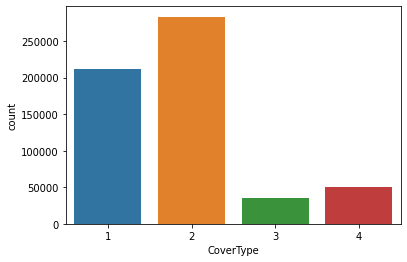

In [10]:
sns.countplot(forest['CoverType'])
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [0]:
x = forest.drop(columns = ['CoverType'])
y = forest['CoverType']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)

In [0]:
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_testpred = LogReg.predict(x_test)

In [0]:
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           1       0.62      0.63      0.62     63514
           2       0.62      0.78      0.69     85045
           3       0.65      0.19      0.29     10747
           4       0.35      0.00      0.00     14998

    accuracy                           0.62    174304
   macro avg       0.56      0.40      0.40    174304
weighted avg       0.60      0.62      0.58    174304



In [0]:
print(confusion_matrix(y_test,y_testpred))

[[39853 23628    32     1]
 [18206 66400   385    54]
 [  209  8491  2037    10]
 [ 5855  8434   674    35]]


In [0]:
accuracy_score(y_test,y_testpred)

0.6214716816596292

### Decision Tree

In [0]:
forest = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Combined_CoverType_original_data2.csv')

In [0]:
forest.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness,Soil,CoverType
0,0,2596,51,3,258,0,510,221,232,148,6279,1,29,4
1,1,2590,56,2,212,-6,390,220,235,151,6225,1,29,4
2,2,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
3,3,2785,155,18,242,118,3090,238,238,122,6211,1,30,2
4,4,2595,45,2,153,-1,391,220,234,150,6172,1,29,4


In [0]:
forest = forest.drop(columns = forest.columns[:1])

In [0]:
forest['Wilderness'] = forest['Wilderness'].astype('category')
forest['Soil'] = forest['Soil'].astype('category')
forest['CoverType'] = forest['CoverType'].astype('category')

In [0]:
x = forest.drop(columns= ['CoverType'])
y = forest['CoverType']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 

In [0]:
param_grid = {
    'max_depth': range(0, 20),
    'min_samples_leaf': range(0, 50, 10),
    'min_samples_split': range(0, 50, 10),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

dtree = DecisionTreeClassifier(random_state=25)
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 154.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=25,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                     

In [0]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [0]:
# model with optimal hyperparameters
dt = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 25,
                                  max_depth=19, 
                                  min_samples_leaf=10,
                                  min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=19, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=25, splitter='best')

In [0]:
y_testpred = dt.predict(x_test)

In [0]:
print('Training Accuracy for DecisionTree Classifier: ', accuracy_score(y_train,dt.predict(x_train)))

Training Accuracy for DecisionTree Classifier:  0.9240511620130413


In [0]:
print('Training Accuracy for DecisionTree Classifier: ', accuracy_score(y_test,y_testpred))

Training Accuracy for DecisionTree Classifier:  0.8978566183220121


In [0]:
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           1       0.90      0.88      0.89     63514
           2       0.90      0.92      0.91     85045
           3       0.90      0.90      0.90     10747
           4       0.88      0.83      0.85     14998

    accuracy                           0.90    174304
   macro avg       0.89      0.88      0.89    174304
weighted avg       0.90      0.90      0.90    174304



In [0]:
print(confusion_matrix(y_test,y_testpred))

[[55943  7158     3   410]
 [ 5725 78343   319   658]
 [    8   334  9722   683]
 [  551  1227   728 12492]]


In [0]:
pd.DataFrame({'columns':x.columns,'Importance':dt.feature_importances_})

,columns,Importance
0,Elevation,0.237531
1,Aspect,0.017161
2,Slope,0.011196
3,Horizontal_Distance_To_Hydrology,0.050688
4,Vertical_Distance_To_Hydrology,0.034510
5,Horizontal_Distance_To_Roadways,0.126733
6,Hillshade_9am,0.023921
7,Hillshade_Noon,0.024969
8,Hillshade_3pm,0.014797
9,Horizontal_Distance_To_Fire_Points,0.129036


### Random Forest using decision trees parameters

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
# model with optimal hyperparameters
rforest = RandomForestClassifier(criterion = "entropy", 
                                  random_state = 25,
                                  max_depth=19, 
                                  min_samples_leaf=10,
                                  min_samples_split=10)
rforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=19, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [0]:
y_testpred = rforest.predict(x_test)

In [0]:
print('Training Accuracy for Random Forest Classifier: ', accuracy_score(y_train,rforest.predict(x_train)))

Training Accuracy for Random Forest Classifier:  0.9497305191931312


In [0]:
print('Training Accuracy for Random Forest Classifier: ', accuracy_score(y_test,y_testpred))

Training Accuracy for Random Forest Classifier:  0.9266683495502112


In [0]:
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           1       0.94      0.90      0.92     63514
           2       0.92      0.96      0.94     85045
           3       0.93      0.94      0.93     10747
           4       0.94      0.84      0.89     14998

    accuracy                           0.93    174304
   macro avg       0.93      0.91      0.92    174304
weighted avg       0.93      0.93      0.93    174304



In [0]:
print(confusion_matrix(y_test,y_testpred))

[[57398  5926     0   190]
 [ 3131 81405   224   285]
 [    3   279 10110   355]
 [  583  1214   592 12609]]


In [0]:
pd.DataFrame({'columns':x.columns,'Importance':rforest.feature_importances_})

,columns,Importance
0,Elevation,0.285772
1,Aspect,0.029890
2,Slope,0.020385
3,Horizontal_Distance_To_Hydrology,0.045664
4,Vertical_Distance_To_Hydrology,0.039295
5,Horizontal_Distance_To_Roadways,0.113223
6,Hillshade_9am,0.025934
7,Hillshade_Noon,0.027639
8,Hillshade_3pm,0.023531
9,Horizontal_Distance_To_Fire_Points,0.103809


### KNN

In [0]:
from sklearn.preprocessing import StandardScaler

x1 = forest.drop(columns= ['CoverType','Soil','Wilderness'])
y = forest['CoverType']

x_std = StandardScaler().fit_transform(x1)

x_std = pd.DataFrame(x_std, columns = x1.columns)

x = pd.concat([x_std, forest[['Soil','Wilderness']]], axis = 1)
x.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil,Wilderness
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,29,1
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,29,1
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,12,1
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,30,1
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,29,1


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(metric = 'cityblock', n_neighbors= 4, weights= 'distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cityblock',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [0]:
y_testpred = knn.predict(x_test)

In [0]:
print('Training Accuracy for KNN Classifier: ', accuracy_score(y_train,knn.predict(x_train)))

Training Accuracy for KNN Classifier:  1.0


In [0]:
print('Training Accuracy for KNN Classifier: ', accuracy_score(y_test,y_testpred))

Training Accuracy for KNN Classifier:  0.9379417569304204


In [0]:
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           1       0.94      0.93      0.94     63514
           2       0.94      0.95      0.95     85045
           3       0.92      0.92      0.92     10747
           4       0.89      0.89      0.89     14998

    accuracy                           0.94    174304
   macro avg       0.92      0.92      0.92    174304
weighted avg       0.94      0.94      0.94    174304



In [0]:
print(confusion_matrix(y_test,y_testpred))

[[59347  3861     2   304]
 [ 3213 80971   243   618]
 [   10   216  9865   656]
 [  359   689   646 13304]]


### Ensemble

In [0]:
#base_LR = LogisticRegression(random_state = 25)
base_DT = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 25,
                                  max_depth=19, 
                                  min_samples_leaf=10,
                                  min_samples_split=10)
#base_NB = GaussianNB()
base_RF = RandomForestClassifier(criterion = "entropy", 
                                  random_state = 25,
                                  max_depth=19, 
                                  min_samples_leaf=10,
                                  min_samples_split=10)
base_KNN = KNeighborsClassifier(metric = 'cityblock', 
                                n_neighbors= 4, 
                                weights= 'distance')

In [0]:
x = forest.drop(columns= ['CoverType'])
y = forest['CoverType']

### Bagging Classifier

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)

In [0]:
from sklearn.ensemble import BaggingClassifier

Bagged DT

In [0]:
bgcl_DT = BaggingClassifier(base_estimator=base_DT, n_estimators = 51, oob_score=True, random_state=25)

bgcl_DT.fit(x_train, y_train)



BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=19,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=10,
                                                        min_samples_split=10,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=25,

In [0]:
y_testpred = bgcl_DT.predict(x_test)

In [0]:
print('Training Accuracy for Bagged DT: ', accuracy_score(y_train,bgcl_DT.predict(x_train)))

Training Accuracy for Bagged DT:  0.9632045595365717


In [0]:
print('Training Accuracy for Bagged DT: ', accuracy_score(y_test,y_testpred))

Training Accuracy for Bagged DT:  0.941320910592987


In [0]:
print('OOB Score for Bagged DT:', bgcl_DT.oob_score_)

OOB Score for Bagged DT: 0.9377243624418502


In [0]:
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           1       0.95      0.93      0.94     63514
           2       0.94      0.96      0.95     85045
           3       0.94      0.95      0.94     10747
           4       0.94      0.88      0.91     14998

    accuracy                           0.94    174304
   macro avg       0.94      0.93      0.93    174304
weighted avg       0.94      0.94      0.94    174304



In [0]:
print(confusion_matrix(y_test,y_testpred))

[[58999  4302     2   211]
 [ 2844 81712   199   290]
 [    4   197 10195   351]
 [  456   880   492 13170]]


Bagged RF

In [0]:
bgcl_RF = BaggingClassifier(base_estimator=base_RF, n_estimators = 51, oob_score=True, random_state=25)
bgcl_RF.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=19,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=10,
                                                        min_samples_split=10,
                                                        min_weight_fraction_leaf=0.0,
  

In [0]:
y_testpred = bgcl_RF.predict(x_test)

In [0]:
print('Training Accuracy for Bagged RF: ', accuracy_score(y_train,bgcl_RF.predict(x_train)))

Training Accuracy for Bagged RF:  0.9320618232245247


In [0]:
print('Training Accuracy for Bagged RF: ', accuracy_score(y_test,y_testpred))

Training Accuracy for Bagged RF:  0.9133066366807417


In [0]:
print('OOB Score for Bagged RF:', bgcl_RF.oob_score_)

OOB Score for Bagged RF: 0.9126769082486698


In [0]:
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           1       0.93      0.89      0.91     63514
           2       0.90      0.95      0.93     85045
           3       0.91      0.93      0.92     10747
           4       0.93      0.80      0.86     14998

    accuracy                           0.91    174304
   macro avg       0.92      0.89      0.90    174304
weighted avg       0.91      0.91      0.91    174304



In [0]:
print(confusion_matrix(y_test,y_testpred))

[[56492  6804     4   214]
 [ 3785 80695   263   302]
 [    3   349 10002   393]
 [  736  1523   735 12004]]


Bagged KNN

In [0]:
bgcl_KNN = BaggingClassifier(base_estimator=base_KNN, n_estimators = 51, oob_score=True, random_state=25)
bgcl_KNN.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='cityblock',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=4, p=2,
                                                      weights='distance'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=51, n_jobs=None, oob_score=True,
                  random_state=25, verbose=0, warm_start=False)

In [0]:
y_testpred = bgcl_KNN.predict(x_test)

In [0]:
print('Training Accuracy for Bagged KNN: ', accuracy_score(y_train,bgcl_KNN.predict(x_train)))

Training Accuracy for Bagged KNN:  0.9999729535686537


In [0]:
print('Training Accuracy for Bagged KNN: ', accuracy_score(y_test,y_testpred))

Training Accuracy for Bagged KNN:  0.9716013401872591


In [0]:
print('OOB Score for Bagged KNN:', bgcl_KNN.oob_score_)

OOB Score for Bagged KNN: 0.9697719248207559


In [0]:
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97     63514
           2       0.97      0.98      0.98     85045
           3       0.97      0.97      0.97     10747
           4       0.95      0.95      0.95     14998

    accuracy                           0.97    174304
   macro avg       0.97      0.97      0.97    174304
weighted avg       0.97      0.97      0.97    174304



In [0]:
print(confusion_matrix(y_test,y_testpred))

[[61584  1778     3   149]
 [ 1530 83131    92   292]
 [    2   106 10407   232]
 [  191   346   229 14232]]


### AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost DT

In [0]:
abcl_DT = AdaBoostClassifier(base_estimator=base_DT,n_estimators=50,random_state=25)

In [0]:
abcl_DT.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=19,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                    

In [0]:
y_testpred = abcl_DT.predict(x_test)

In [0]:
print('Training Accuracy for AdaBoost DT: ', accuracy_score(y_train,abcl_DT.predict(x_train)))

Training Accuracy for AdaBoost DT:  1.0


In [0]:
print('Training Accuracy for AdaBoost DT: ', accuracy_score(y_test,y_testpred))

Training Accuracy for AdaBoost DT:  0.9529844409766844


In [0]:
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63514
           2       0.95      0.97      0.96     85045
           3       0.96      0.95      0.95     10747
           4       0.95      0.90      0.93     14998

    accuracy                           0.95    174304
   macro avg       0.95      0.94      0.95    174304
weighted avg       0.95      0.95      0.95    174304



In [0]:
print(confusion_matrix(y_test,y_testpred))

[[59914  3490     0   110]
 [ 2338 82380   133   194]
 [    1   159 10242   345]
 [  380   696   349 13573]]


AdaBoost RF

In [0]:
abcl_RF = AdaBoostClassifier(base_estimator=base_RF,n_estimators=50,random_state=25)

In [0]:
abcl_RF.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=19,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                    

In [0]:
y_testpred = abcl_RF.predict(x_test)

In [0]:
print('Training Accuracy for AdaBoost RF: ', accuracy_score(y_train,abcl_RF.predict(x_train)))

Training Accuracy for AdaBoost RF:  0.8885047749245158


In [0]:
print('Training Accuracy for AdaBoost RF: ', accuracy_score(y_test,y_testpred))

Training Accuracy for AdaBoost RF:  0.8496190563612998


In [0]:
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           1       0.88      0.76      0.82     63514
           2       0.83      0.94      0.88     85045
           3       0.84      0.91      0.87     10747
           4       0.90      0.66      0.76     14998

    accuracy                           0.85    174304
   macro avg       0.86      0.82      0.83    174304
weighted avg       0.85      0.85      0.85    174304



In [0]:
print(confusion_matrix(y_test,y_testpred))

[[48431 15005     0    78]
 [ 4572 79969   255   249]
 [    2   267  9750   728]
 [ 2123  1302  1631  9942]]


GradientBoost

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
gbcl = GradientBoostingClassifier(random_state = 25,
                                  max_depth=19, 
                                  min_samples_leaf=10,
                                  min_samples_split=10,
                                  n_estimators = 50)
gbcl.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=19,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=25, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
y_testpred = gbcl.predict(x_test)

In [0]:
print('Training Accuracy for GradientBoost Classifier: ', accuracy_score(y_train, gbcl.predict(x_train)))

Training Accuracy for GradientBoost Classifier:  1.0


In [0]:
print('Training Accuracy for GradientBoost Classifier: ', accuracy_score(y_test,y_testpred))

Training Accuracy for GradientBoost Classifier:  0.9710276298880117


In [0]:
print(classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97     63514
           2       0.97      0.98      0.98     85045
           3       0.96      0.97      0.97     10747
           4       0.96      0.94      0.95     14998

    accuracy                           0.97    174304
   macro avg       0.97      0.96      0.96    174304
weighted avg       0.97      0.97      0.97    174304



In [0]:
print(confusion_matrix(y_test,y_testpred))

[[61462  1912     2   138]
 [ 1344 83359   101   241]
 [    2   118 10394   233]
 [  230   445   284 14039]]
